# Introduction au traitement du signal
## Conversion analogique numérique
### Choix d'un signal analogique

Soit un signal analogique sinusoïdal de fréquence 1 Hz (période 1 s). 

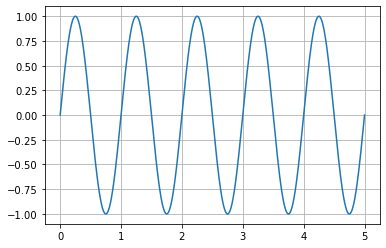

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = 1             # Période (s)
om = 2*np.pi/T    # Pulsation (rad/s)
les_t = np.linspace(0,5,10000)
def make_signal(les_t):
    return np.sin(om*les_t)
les_e = make_signal(les_t)
plt.grid()
plt.plot(les_t,les_e)

### Echantillonnage du signal
#### Raisonnement naïf

In [2]:
def echantillonnage(les_t,les_e,fe):
    """
     * les_t : temps
     * les_e : signal analogique d'entrée
     * fe : fréquence d'échantillonnage
    """
    les_te = [les_t[0]]
    les_s = [les_e[0]]
    k = 1
    for i in range(len(les_t)):
        if les_t[i]>k*1/fe :
            les_te.append(les_t[i])
            les_s.append(les_e[i])
            k = k+1
    return les_te,les_s

Text(0.5, 1.0, 'Echantillonnage à 50 Hz')

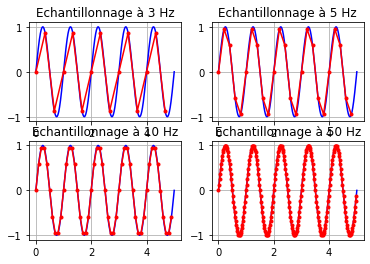

In [3]:
les_te1,les_s1 = echantillonnage(les_t,les_e,3)
les_te2,les_s2 = echantillonnage(les_t,les_e,5)
les_te3,les_s3 = echantillonnage(les_t,les_e,10)
les_te4,les_s4 = echantillonnage(les_t,les_e,50)

fig, axs = plt.subplots(2, 2)

#fig.suptitle('Horizontally stacked subplots')
# Grilles
axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

# Entrée
axs[0, 0].plot(les_t,les_e,"b")
axs[0, 1].plot(les_t,les_e,"b")
axs[1, 0].plot(les_t,les_e,"b")
axs[1, 1].plot(les_t,les_e,"b")

# Sorties filtrées
axs[0, 0].plot(les_te1,les_s1,"r.-")
axs[0, 1].plot(les_te2,les_s2,"r.-")
axs[1, 0].plot(les_te3,les_s3,"r.-")
axs[1, 1].plot(les_te4,les_s4,"r.-")

# Titres des graphiques
axs[0, 0].set_title("Echantillonnage à 3 Hz")
axs[0, 1].set_title("Echantillonnage à 5 Hz")
axs[1, 0].set_title("Echantillonnage à 10 Hz")
axs[1, 1].set_title("Echantillonnage à 50 Hz")

####  Un autre style de naïveté...

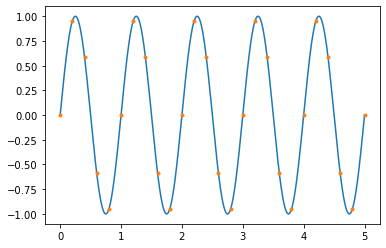

In [10]:
fe = 5
N = int(les_t[-1]*fe) # Nombre d'échantillons pour un horizon temporel et une fréquence donnée
les_te = np.linspace(0,N/fe,N+1)
plt.plot(les_t,les_e)
plt.plot(les_te,make_signal(les_te),".")

#### Avec un peigne de Dirac ?

### Signal échantillonné bloqué

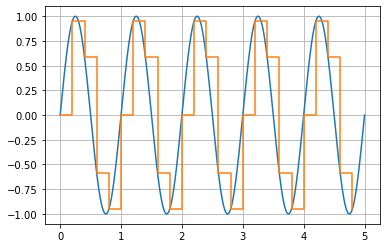

In [31]:
def bloquageSignal(les_t,les_e):
    les_tb,les_eb = [],[]
    
    for i in range(len(les_t)-1):
        les_tb.append(les_t[i])
        les_eb.append(les_e[i])
        les_tb.append(les_t[i+1])
        les_eb.append(les_e[i])
    les_tb.append(les_tb[-1])
    les_eb.append(les_e[-1])
    return les_tb,les_eb

les_tb2,les_eb2 = bloquageSignal(les_te2,les_s2)
plt.grid()
plt.plot(les_t,les_e)
plt.plot(les_tb2,les_eb2)
plt.show()


### Quantification du signal

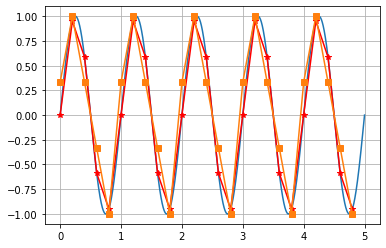

In [56]:
def quantification(N,les_s,mini,maxi):
    """
    Quantification sur N bits entre bornes.
    Quantification au plus proche.
    """
    delta = (maxi-mini)/(2**N-1)
    les_niv = [mini+k*delta for k in range(2**N)]
    les_sq = []
    for v in les_s : 
        for i in range(len(les_niv)-1):
            if v >= les_niv[i] and v <= les_niv[i+1]: # On regarde l'intervalle de quantif
                if v<les_niv[i]+delta/2 :
                    les_sq.append(les_niv[i])
                else : 
                    les_sq.append(les_niv[i+1])
    return les_sq
les_sq = quantification(2,les_s2,-1,1)
plt.grid()
plt.plot(les_t,les_e)         # Signal analogique
plt.plot(les_te2,les_s2,"r*-") # Signal échantillonné
plt.plot(les_te2[0:len(les_sq)],les_sq,"s-") # Signal numérique

# plt.plot(les_tb,les_eb)

plt.show()

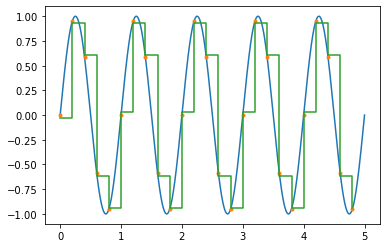

In [57]:
# Signal : les_t, les_e
# Signal échantillonnage 5 Hertz, bloqué sur 2 bits

# Signal échantillonné : les_te2,les_s2

# Signal échantilloné et quantifié sur 2 ou 3 bits
les_seq2 = quantification(5,les_s2,-1,1)
# Signal échantilloné et quantifié sur 2 bits puis bloqué
les_teqb2,les_seqb2 = bloquageSignal(les_te2,les_seq2)

plt.plot(les_t,les_e)
plt.plot(les_te2,les_s2,".")
plt.plot(les_teqb2,les_seqb2)

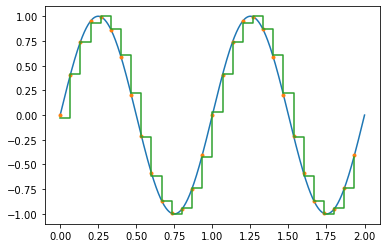

In [63]:
les_t = np.linspace(0,2,10000)
les_e = make_signal(les_t)

# A 20 Hz
les_te20,les_s20 = echantillonnage(les_t,les_e,15)

# Signal échantilloné et quantifié sur 2 ou 3 bits
les_seq20 = quantification(5,les_s20,-1,1)
# On bloque le signal
les_teqb20,les_seqb20 = bloquageSignal(les_te20,les_seq20)


plt.plot(les_t,les_e)
plt.plot(les_te20,les_s20,".")
plt.plot(les_teqb20,les_seqb20)